In [57]:
%run ../button.ipynb

<IPython.core.display.Javascript object>

<a id="top"></a>
<center><h1>Demonstration of Methods</h1></center>
----

In order to have a better understanding of each method, we made several comparisons either between more than two methods on one data set OR performance of one method on various data sets. All of these specific cases will enhance and impress the power of methods.

1. [ t-SNE versus Linear PCA on handwritten dataset](#tsne pca)
- [ Gaussian Kernel PCA on concentric circle and mice dataset](#kernel pca)
- [ Isomap versus randomised SVD Linear PCA on eigenfaces dataset](#fa pca)
- [ Difference of geodesic and Euclidean distance chosen in the algorithm of methods](#distance)
- [Implementation of pairwise distance methods onto mice data](#mice)



<center><h1>Methods versus datasets</h1></center>

 | Handwritten digits |  Concentric circle| Down Syndrome mice| Eigenfaces | S-Shape manifold| 
  ------------- | ------------- | ------------- | ------------- |------------- | ------------- |
 [Linear Principal Component Analysis](#pca)|  $\times$ | $\times$  |   |$\times$ |   | 
 [Multidimensional Scaling](#mds)|   |  | $\times$  | | | 
 [Local Linear Embedding](#LLE)|   |   |$\times$ | |$\times$ | 
 [Isomap](#isomap)|   |   |  $\times$ | $\times$|$\times$ | 
 [Kernel Principal Component Analysis](#kernel pca)|   |  $\times$ | $\times$  | | | 
 [t-distributed Stochastic Neighbour Embedding](#tsne)| $\times$  |   | $\times$   | | | 

[[back to outline](../Tutorial notebook.ipynb#top)]



- Load [dataset](../casestudy/casestudy.ipynb#digits)

In [81]:
%run functions.ipynb #load related function needed for this sheet

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Created on Mon Sep 11 15:15:22 2017

@author: zx621293



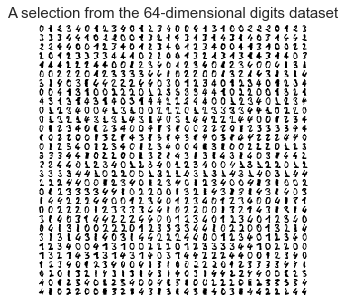

<IPython.core.display.Javascript object>

8 proteins covariates are deleted due to more than three missing value for that protein
[22, 26, 67, 68, 70, 72, 73, 74]
105 experiments are deleted due to more than three missing protein value for that experiment
[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329]
Check no more missing value in our refined dataset: True
The resulting input data matrix is refined from 
525 by 76 
to 
420 by 68 dimension
Dataset consists of 400 faces


<IPython.core.display.Javascript object>

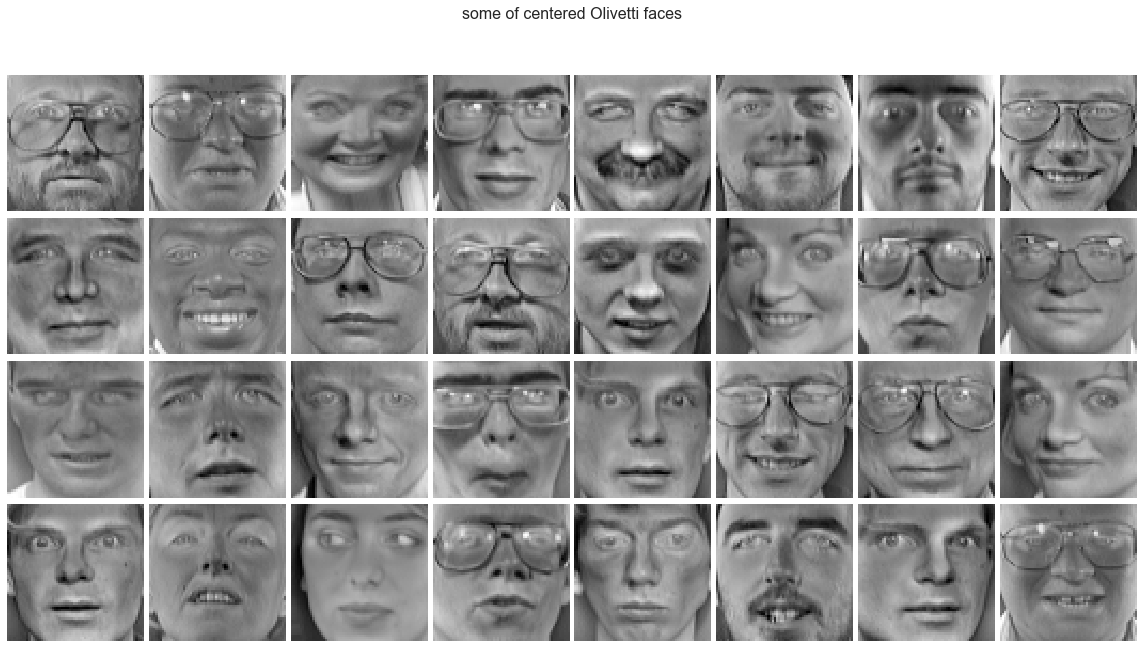

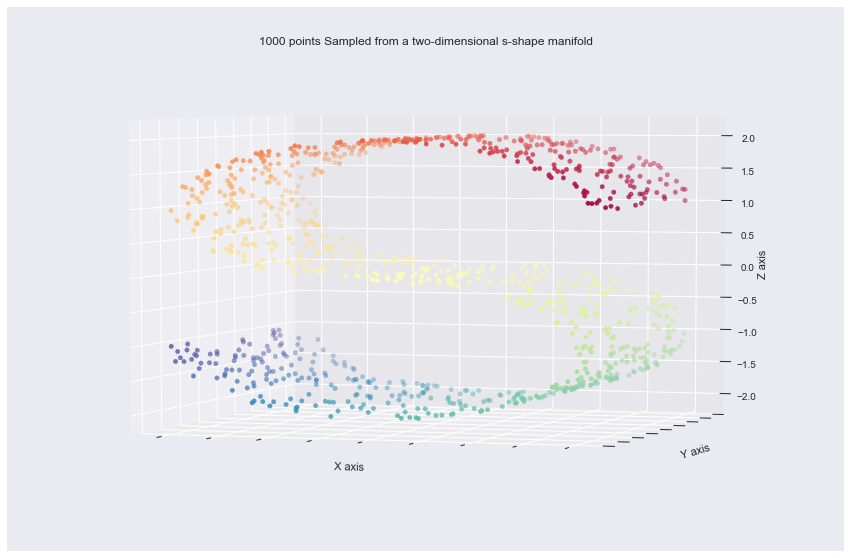

In [59]:
%run ../casestudy/functions.ipynb
%run ../casestudy/casestudy.ipynb

<a id='tsne pca'></a>

# 1. t-SNE versus Linear PCA on handwritten digits

[[back to top](#top)]

## [Linear PCA](../definition/definition.ipynb#pca) on handwritten digits

- Load functions
> [plot_embedding](functions.ipynb#plot_embedding) (handwritten digits dataset, title)
>
> [myLinearPCA](functions.ipynb#myLinearPCA) (X,label_refine,label)

- Impliment random SVD linear PCA onto rescaled data by **Method 1: Rescale each column of $X$ into a standard normal distribution.**

    $$\mu_i = mean(X_i),\quad \sigma^2_i = variance(X_i),$$
    
    $$X_{rescaled} = \frac{X_i - \mu_i}{\sigma_i} \sim N(0,1)$$
    
    

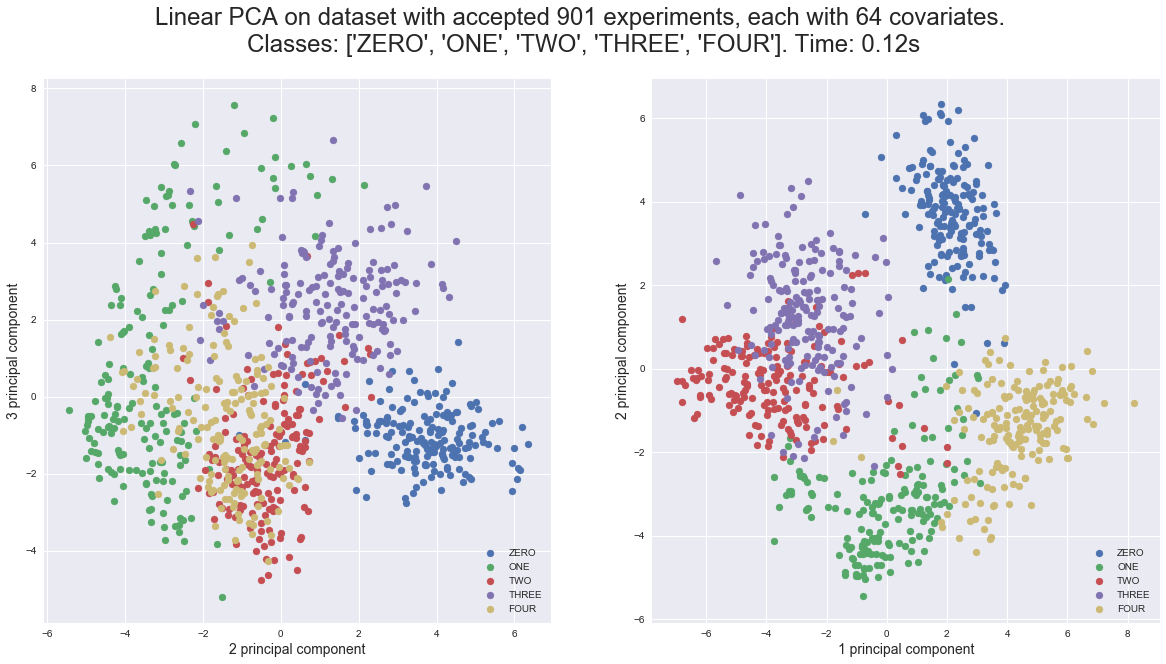

In [60]:
X_digits_rescale1 = preprocessing.scale(X_digits)
(X_pca, PCAcomponents) = myLinearPCA(X_digits_rescale1,y_digits,label_digits)

- Implement truncated linear PCA onto rescaled data according to **Method 2: rescale each column of $X$ into range $[0,1]$**

$$    x_{min} = \min(X_i),\quad  x_{max} = \max(X_i) $$

$$  X_{rescaled} = \frac{X_i - x_{min}}{x_{max} - x_{min}}\in [0,1]$$
(Abuse of notation here)

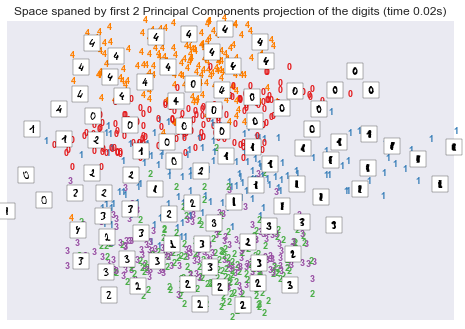

In [61]:
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X_digits)
x_min, x_max = np.min(X_pca, 0), np.max(X_pca, 0)
X_pca_rescale = (X_pca - x_min) / (x_max - x_min)
y = y_digits
plot_embedding(X_pca_rescale,
               "Space spaned by first 2 Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))

## [t-stochastic Neighbour Embedding](../definition/definition.ipynb#tsne) on handwritten digits

- Load functions
> [myTSNE](functions.ipynb#myTSNE) (dataset, classes, label, perpexity) = projected data matrix

- Impliment t-SNE onto rescaled *input* data by **Method 1: Rescale each column of $X_{input}$ into a standard normal distribution.**

    $$\mu_i = mean(X_i),\quad \sigma^2_i = variance(X_i),$$
    
    $$X_{rescaled} = \frac{X_i - \mu_i}{\sigma_i} \sim N(0,1)$$
    
    

t-SNE with perpexity  5: 5.5 sec
t-SNE with perpexity 15: 7.8 sec
t-SNE with perpexity 30: 10 sec
t-SNE with perpexity 50: 15 sec


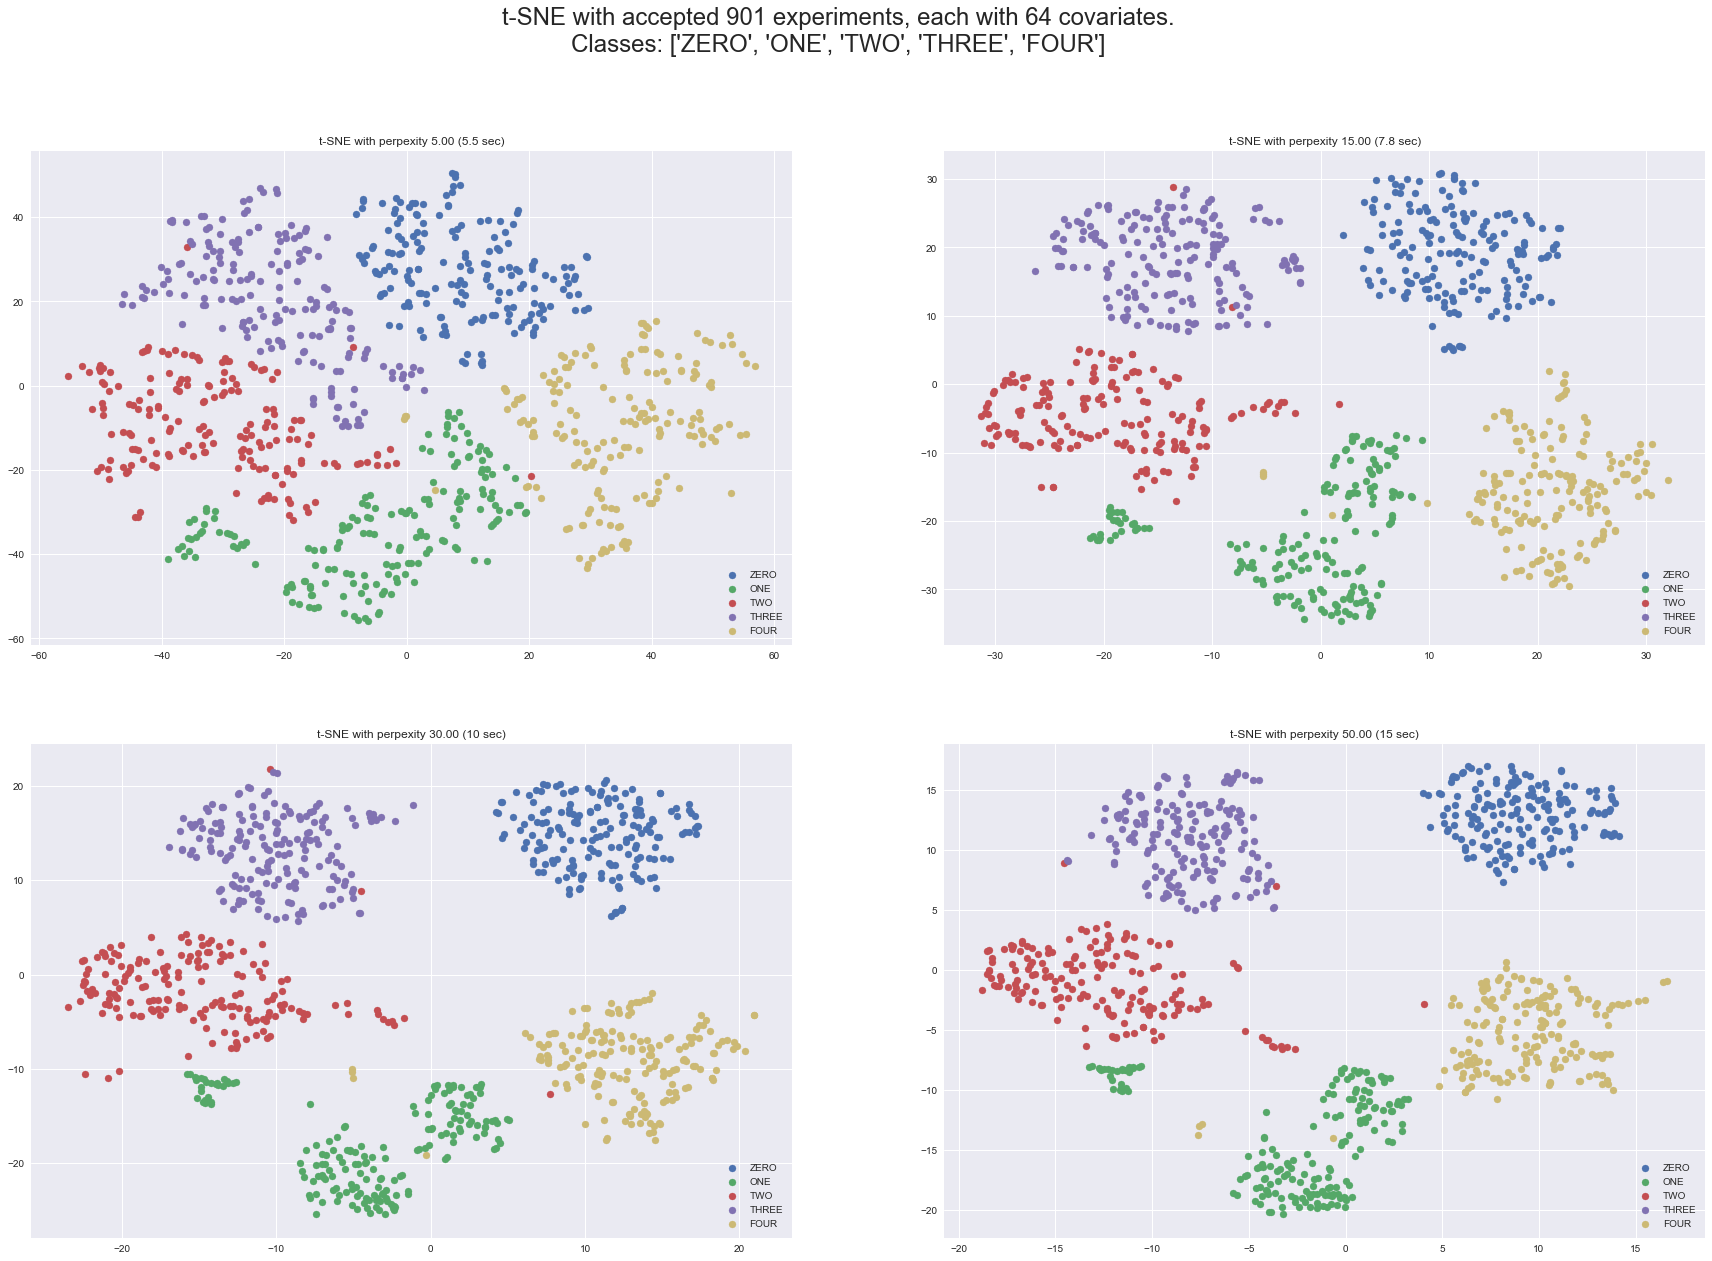

In [62]:
perp = [5,15,30,50]
X_tsne = myTSNE(X_digits_rescale1,y_digits,label_digits,perp)

Larger value of perplexity will result in better visualisation. From the perspective of definition of t-SNE, since more neighbours will be considered for each data point when making projection, so it has clear pattern of clustering.

 - Additional Step: rescale the *output* data according to **Method 2: rescale each column of $X_{output}$ into range $[0,1]$**

$$    x_{min} = \min(X_i),\quad  x_{max} = \max(X_i) $$

$$  X_{rescaled} = \frac{X_i - x_{min}}{x_{max} - x_{min}}\in [0,1]$$

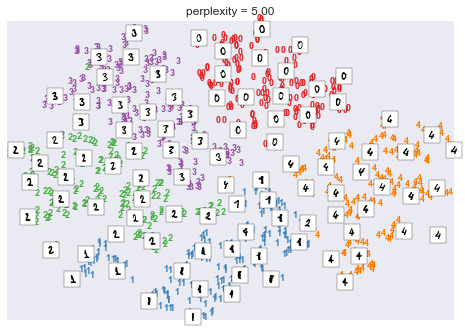

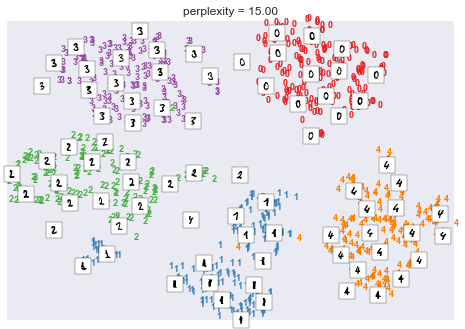

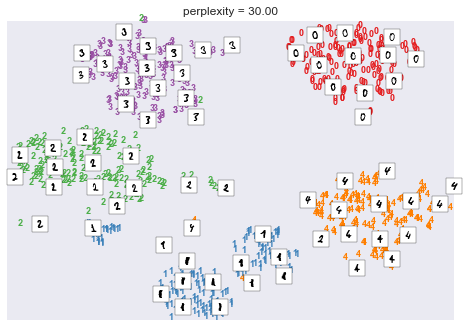

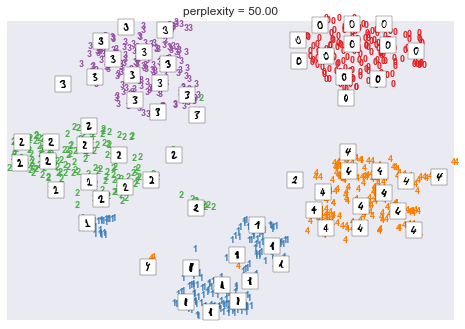

In [63]:

l = np.linspace(0,len(X_tsne)-1,len(X_tsne)).astype('int')
for i in l:
    x_min, x_max = np.min(X_tsne[i], 0), np.max(X_tsne[i], 0)
    X_tsne_rescale = (X_tsne[i] - x_min) / (x_max - x_min)
    plot_embedding(X_tsne_rescale ,
                   'perplexity = %.2f'%(perp[i]))

## Comment 
> t-SNE perform much better than linear PCA on handwritten digits, because the resulting plot can be clearly clustered by groups, some small errrors though.


<a id='kernel pca'></a>

# 2. [Gaussian Kernel PCA](../definition/definition.ipynb#kernel pca) on concentric circle and mice dataset

[[back to top](#top)]

##  Kernel PCA on [mice dataset](../casestudy/casestudy.ipynb#mice)

- Load Function: 
> [myGKernelPCA](functions.ipynb#myGKernelPCA) (refined data, refine classes, label, gamma) =  (projected data matrix on principal component basis, principal component)
> [RefineData](functions.ipynb#RefineData) (dataset with missing value, classes) = (refined data, refined classes, deleted rows, deleted columns)

In [64]:
%run -i functions.ipynb

<IPython.core.display.Javascript object>

- Load mice data

- Assign my ground truth: Normal Learning, Failed Learning, Rescued Learning

In [65]:
label_mice = ['Normal Learning','Failed Learning','Rescued Learning']
covariate_list = list(protein.columns.values.astype('str'))

- Rescale the data

In [66]:
#PREPROCESSING
X_mice_scale = preprocessing.scale(X_mice)

- Apply Gassian Kernel PCA onto mice data with $\gamma \in \{0.1,1,20\}$

Gaussian PCA with gamma 0.01: 0.95 sec
Gaussian PCA with gamma 0.01: 0.55 sec
Gaussian PCA with gamma 0.10: 1.7 sec
Gaussian PCA with gamma 0.10: 0.43 sec
Gaussian PCA with gamma 20.00: 1.2 sec
Gaussian PCA with gamma 20.00: 2.4 sec


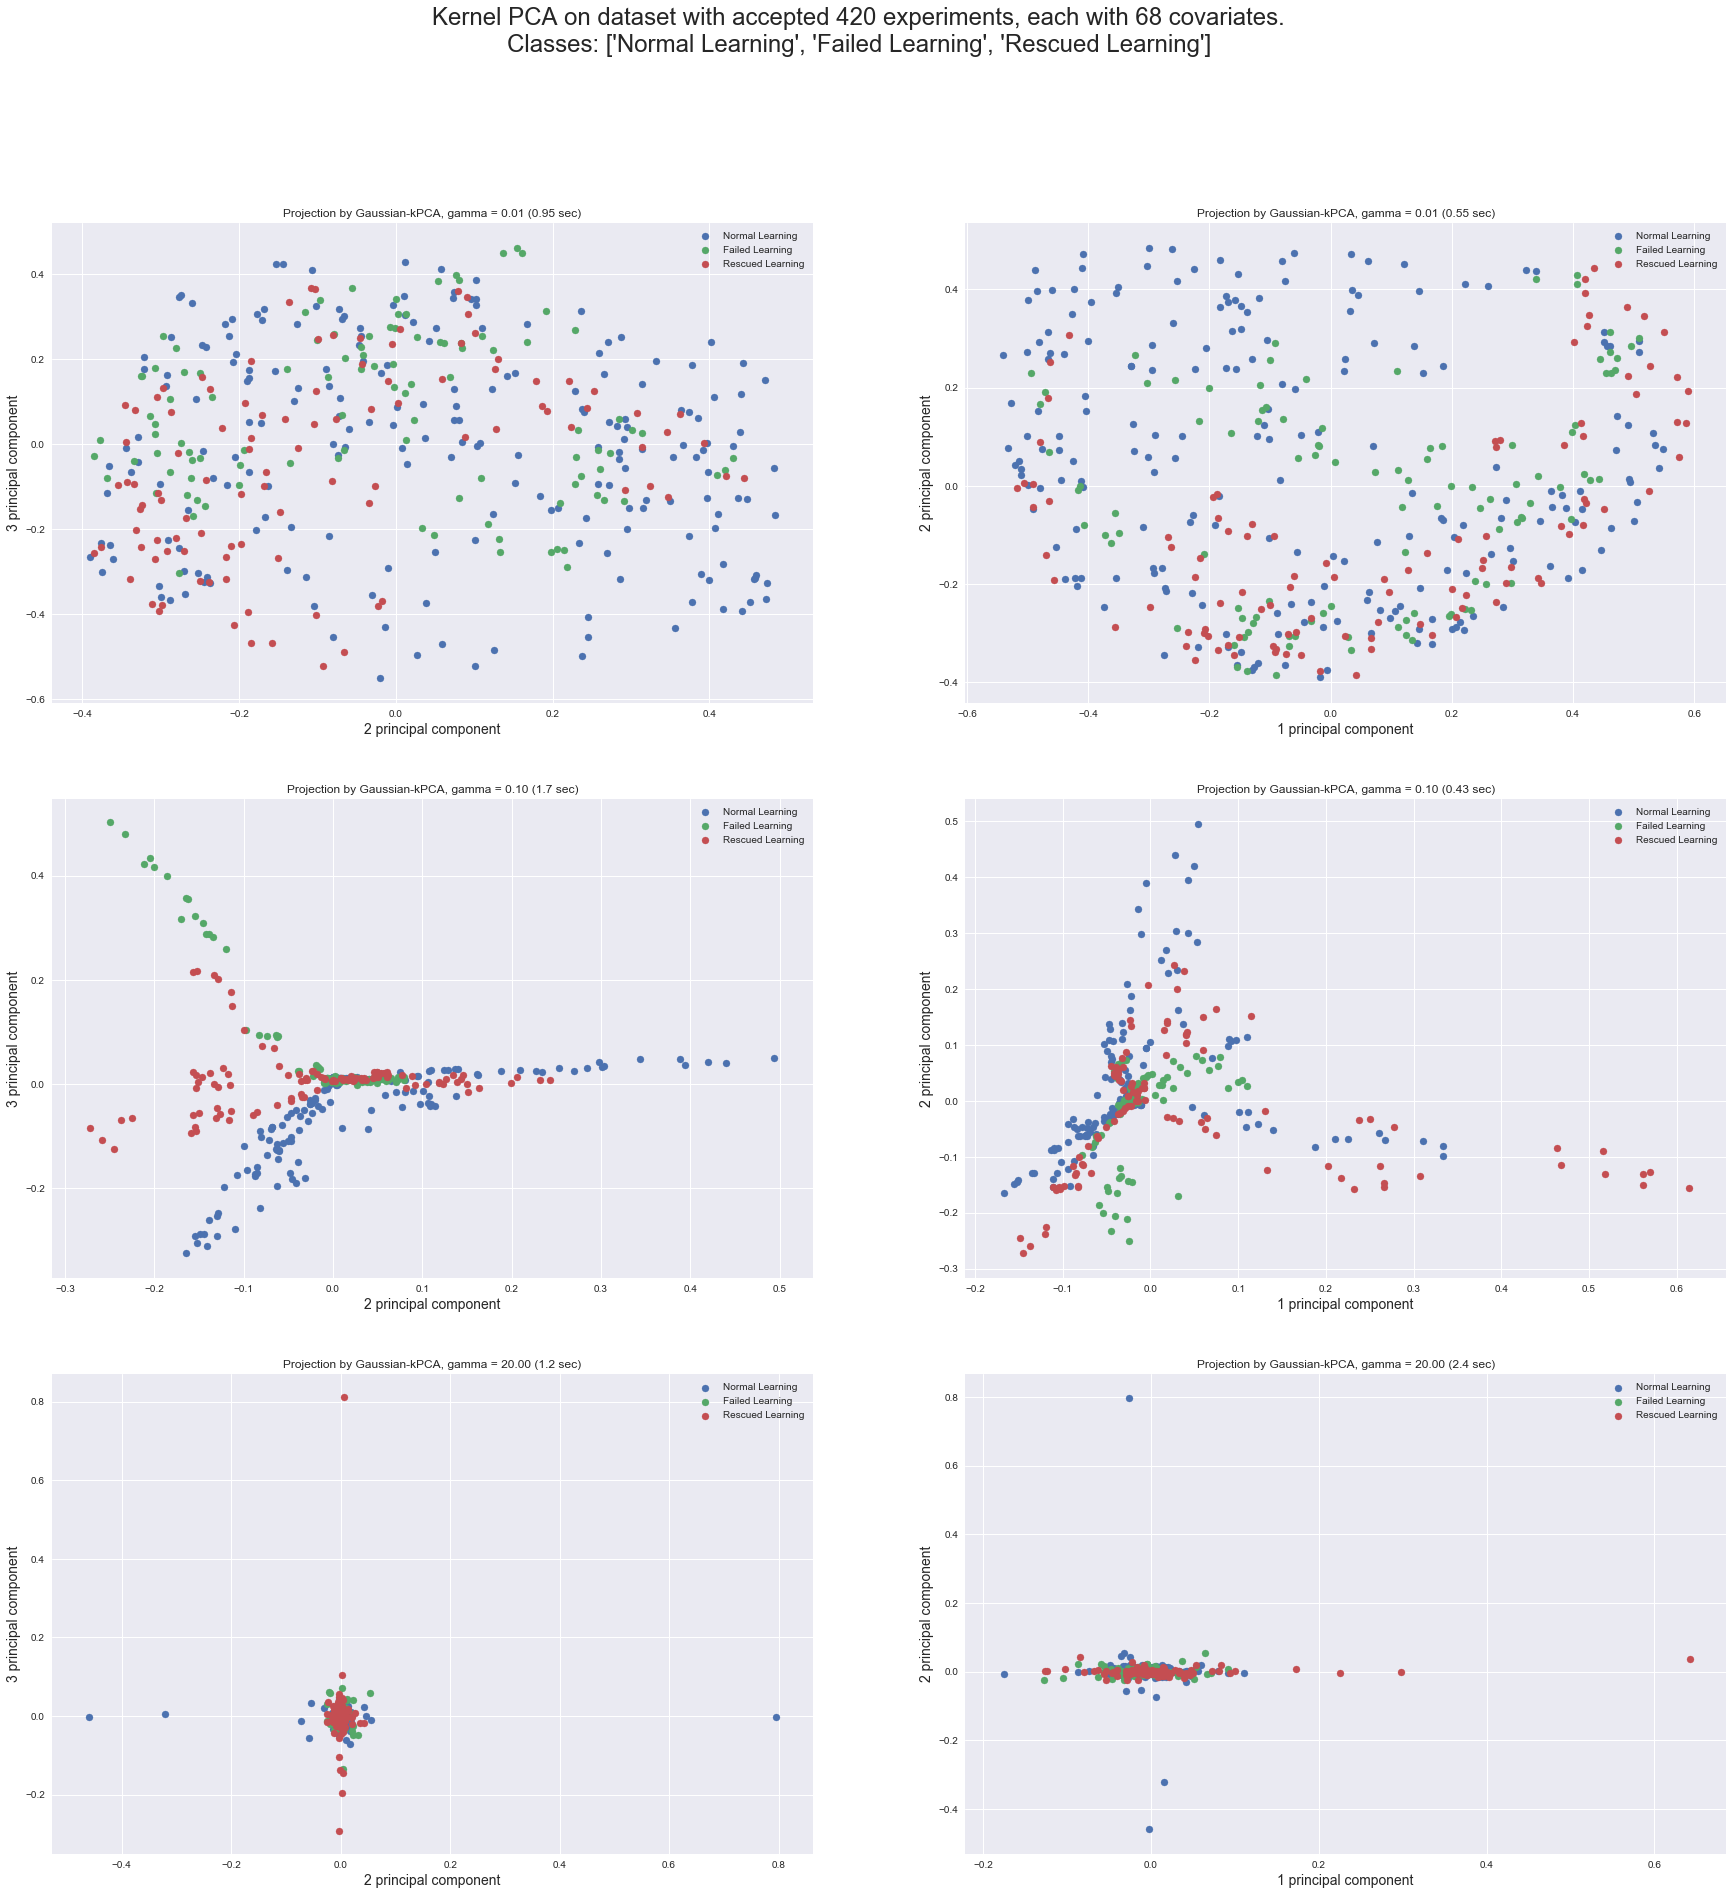

In [67]:
X_kpca,components = myGKernelPCA (X_mice_scale, Y_mice,label_mice, [0.01,0.1,20])

## Kernel PCA on [concentric circle dataset](../casestudy/casestudy.ipynb#concentric circle)

- Three dimensional dataset grouped by two colors, blue and red.

<img src="circle.png" alt="Drawing" style="height: 250px;"/>

- Implementation of Linear PCA, polynomial kernel PCA and Gaussian kernel PCA. **Left:** This is a linear subspace spanned by the first two principal components, and the data points are the projection of original data sets onto such subspace. It does not show a satified result because such visualization is hard to manipulate classification process afterwards. **Middle and Right:** It shows that Gaussian kernel performs better than polynomical kernel, because the projected points on space spanned by first two principal components for Gaussian kernel PCA can be linearly separable visually, such senario will reduce the complexity to do classification afterwards.

<img src="circle_pca.png" alt="Drawing" style="height: 250px;"/>

## Comment 
> **Comparison between two performances:** Gaussian kernel PCA behavied quite well on concentric circle dataset. However, in the plot of kernel PCA on mice dataset, we can hardly see any pattern of clusters in any value of $\gamma$. We should question about the validity and assumption of using Kernel PCA on data visualisation purpose.

> **Criterion:** The performance of Gaussian kernel PCA will be great only if the observations follows multivariate gaussian distribution. Thus, this explained the bad performance on mice data set.

> **Suggestion:** Kernel PCA is not a good choice of data visualisation. Remember that the projected two dimensional space is spanned by the first and second principal component of kernel PCA, but different from linear PCA, the principal component of kernerl PCA did not explain the direction of the highest contribution of data variance. On the other side, from the perspective of definition of [kernel PCA](../definition/definition.ipynb#kernel pca), it transforms dataset into kernel feature space and then projects these onto a higher dimensional space, usually dimension equals to number of observations.  Thus, it is less meaningful to plot the space spanned by first few principal components.



<a id='fa pca'></a>

# 3. Isomap versus randomised SVD Linear PCA on [eigenfaces dataset](../casestudy/casestudy.ipynb#eigenfaces)

[[back to top](#top)]

## Randomized SVD Linear PCA

Application of Linear PCA on 400 faces. The following is the space spanned by first/second and second/third principal components respectively.

No ground truth provided in this dataset


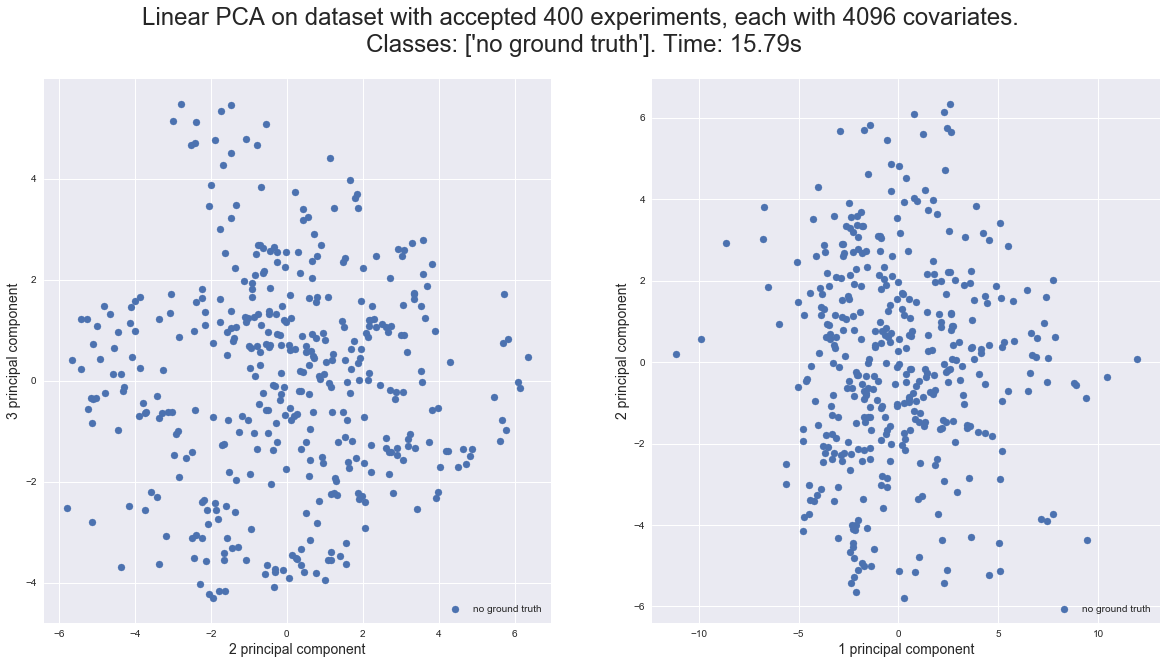

In [68]:
X_pca,com_pca = myLinearPCA(faces_centered,[],[])

 - Load Function:
 > [plot_gallery](functions.ipynb#plot_gallery)

In [69]:
#run ../casestudy/functions.ipynb

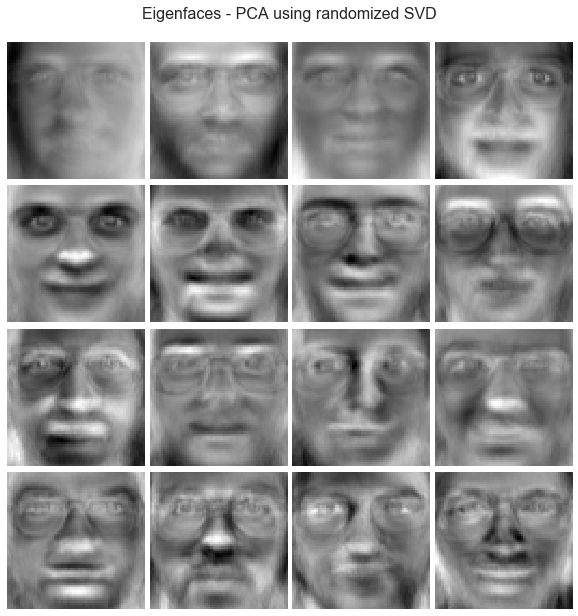

In [70]:
plot_gallery('Eigenfaces - PCA using randomized SVD',com_pca,4,4)

## Isomap

 - Load Function:
 > [myIsomap](functions.ipynb#myIsomap)

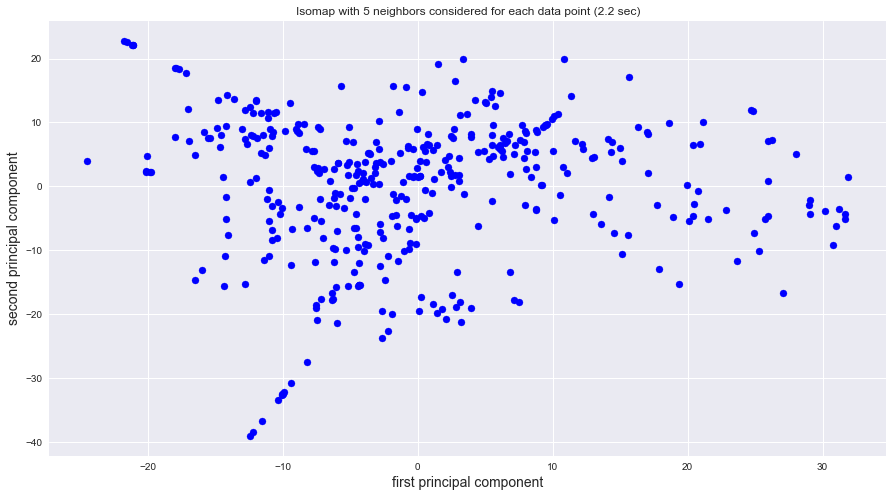

In [71]:
myIsomap(faces_centered, 'blue', 5)

## Comment

Since isomap don't have feature of principal components, so it cannot express the direct visualization of eigenfaces. 

The purpose of show such demonstration is to give the reader a taste about the variation of PCA on image processing. There will be more to learn if your dataset is set of images, each principal component will have its unique interpretation, for example, the very first eigenface is the matrix of pixel transformed from the first principal component of PCA, it illustrate the gerenal direction of faces, front face, in the data set. 

<a id='distance'></a>

# 4. Difference of geodesic and Euclidean distance chosen in the algorithm of methods

[[back to top](#top)]

As introduced in the definition of [Isomap](../definition/definition.ipynb#isomap), the similarity function used in the optimization proceduce is geodesic distance. In order to have a better taste of the difference, the following will demonstrate two comparisons of using isomap and LLE on S-shape manifold data and mice data.

## [Isomap](../definition/definition.ipynb#isomap) and [LLE](../definition/definition.ipynb#lle) on [S-shape manifold](../casestudy/casestudy.ipynb#manifold)

<img src="manifold.png" alt="Drawing" style="width: 500px;"/>

- Take the number of neighbour considered here to be $10$

$$K = 10$$

In [72]:
n_neighbors=10

- **Implementation of isomap on S-shape manifold.** Thanks to geodesic distance, S-shape manifold in three dimensional space can be transformed into two dimensional embedding space, this verified that there is a manifold in the originial space, although it can be observed visually in the three dimensional space.

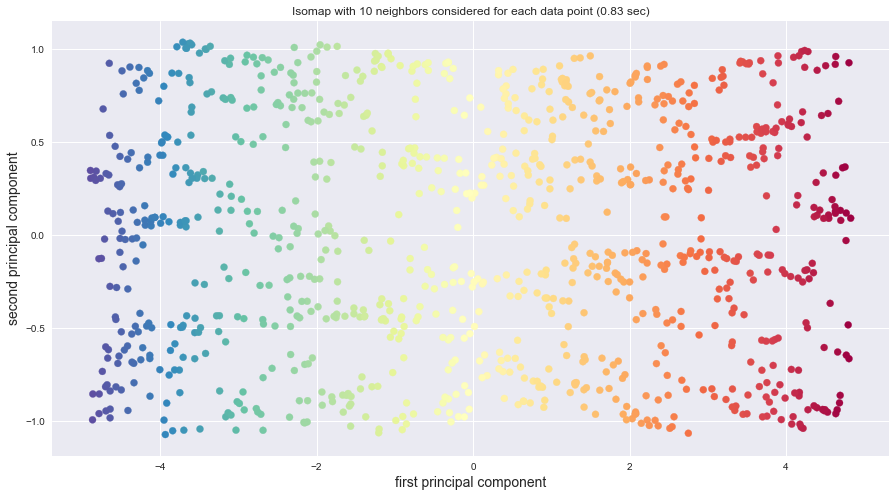

In [73]:
myIsomap(X_manifold, color, n_neighbors)

- **Implementation of LLE on S-shape manifold.**  The purpose of the LLE is to find a low-dimensional representation of the data (here 2D) in which the Euclidean distances between each point and its neighbours keep proportionally the same in both space, unlike other manifold-learning algorithms, it does not seeks an isotropic representation of the data in the low-dimensional space. 

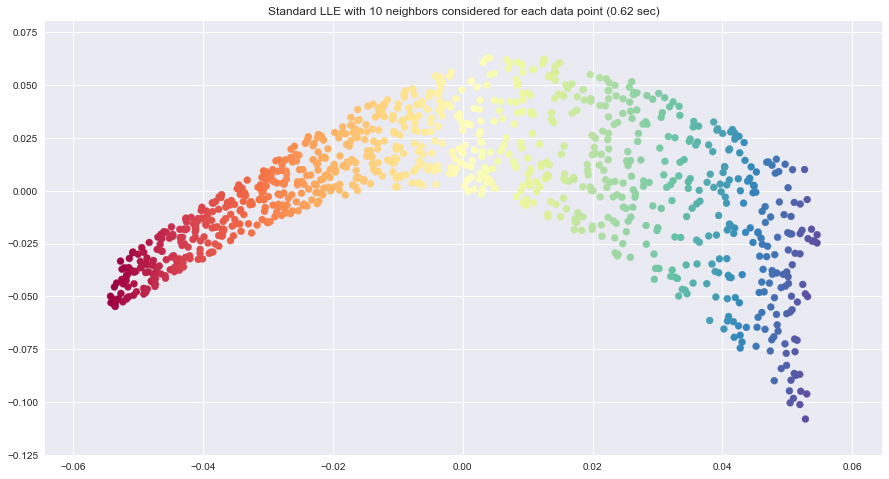

In [74]:
myLLE(X_manifold,color,n_neighbors)

## [Isomap](../definition/definition.ipynb#isomap) and [MDS](../definition/definition.ipynb#mds) on [mice dataset](../casestudy/casestudy.ipynb#mice)

<img src="mice.png" alt="Drawing" style="width: 500px;"/><img src="mice1.png" alt="Drawing" style="width: 300px;"/>

   |Classes| Label   | Color | 
 | ------------- | ------------- | ------------- |
 |Normal Learning|  0| red   |
|  Failed Learning|   1 |yellow  |
| Rescured Learning | 2  | blue   |  


- **Isomap with number of neighbours $30$ onto unrescled mice data.** The plots shown below are two-dimensional projected spaces, spanned by the first two principal components of transformed matrix $\tau(D_G)$ introduced in the definition of isomap. 

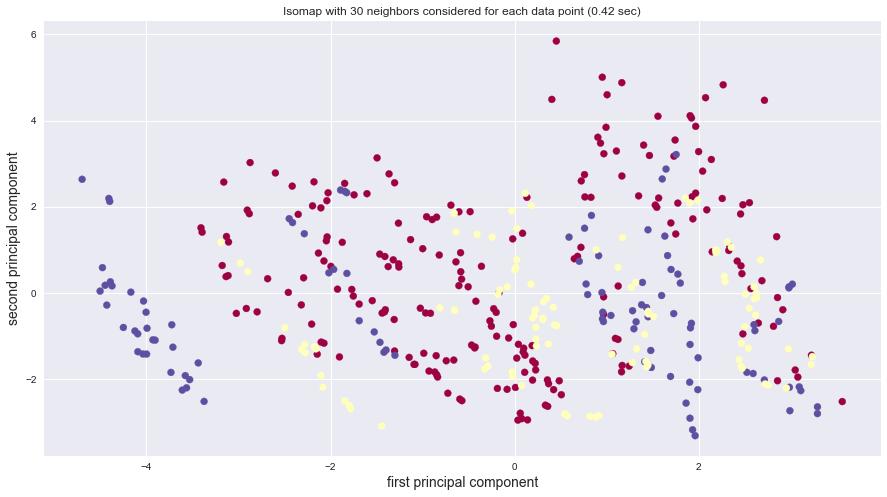

In [75]:
myIsomap(X_mice, Y_mice, n_neighbors=30)

- **Implementation of standard LLE on unrescaled mice dataset.**
Compared with the plot generated by Isomap, it have clearer structure of failed learning (yellow dots) mice,

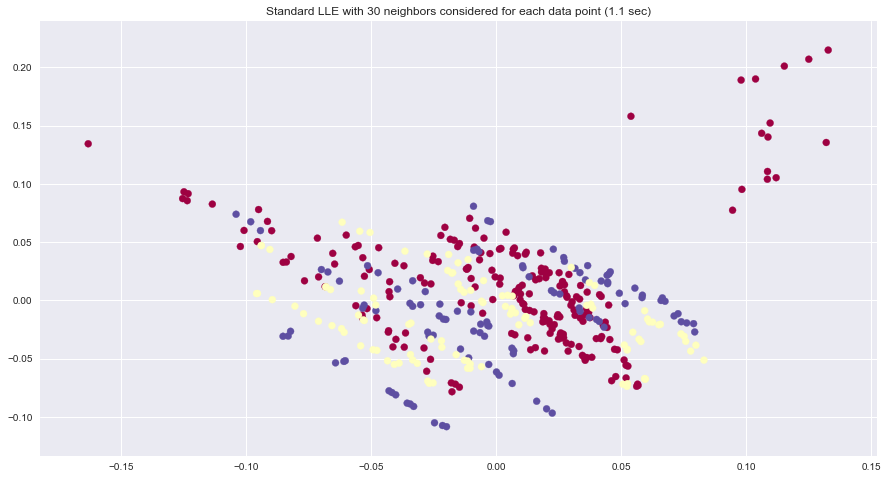

In [76]:
myLLE(X_mice,Y_mice,n_neighbors=30)

## Comment:
**Comparison:** Both methods, isomap and LLE, shows a good visualisation of data set, because there are several series of points can be connected together into strings, and each string must represent some features behind that. This again verified the learning outcome of mice researched by [Higuera Gardiner and Cios (2015)](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0129126).

**Concern:** As mentioned in the drawback of Isomap, the next step of connecting points and finding the feature behind the string will be challenging, so this tutorial will not be involve. 

- Extension: **Implementation of modified LLE on mice dataset with neighbourhood $N = 75 > D=68$.**

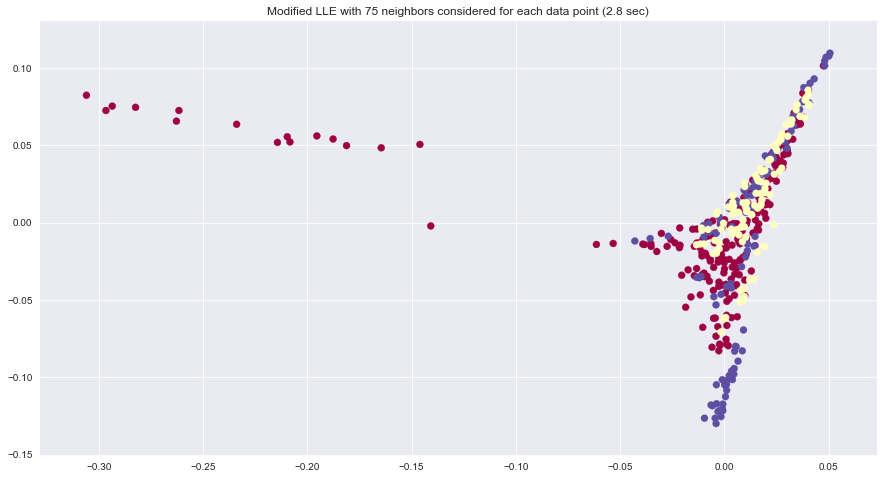

In [77]:
    n_neighbors = 75
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                            eigen_solver='auto',
                                            method='modified').fit_transform(X_mice)
    t1 = time()
    fig = plt.figure(figsize=(15, 8))
    plt.scatter(Y[:, 0], Y[:, 1], c=Y_mice, cmap=plt.cm.Spectral)
    
    plt.title("Modified LLE with %i neighbors considered for each data point (%.2g sec)" % (n_neighbors, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')
    plt.show()

- Consider when implementing on rescaled mice data

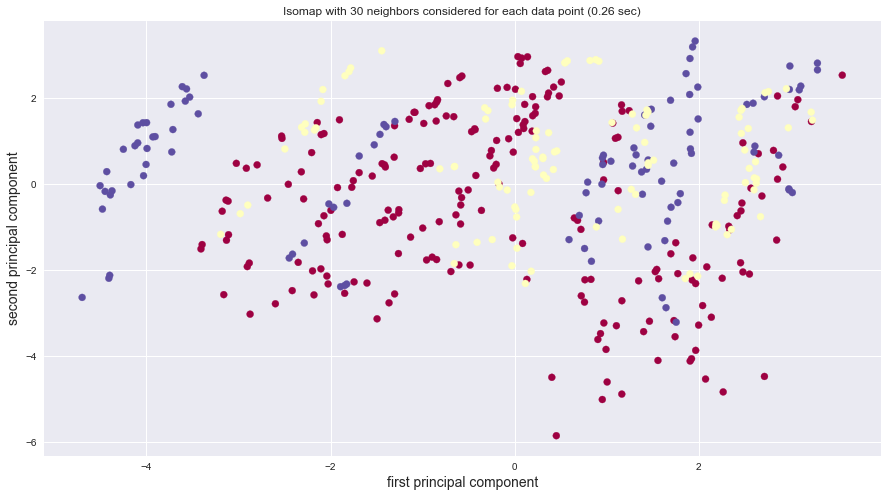

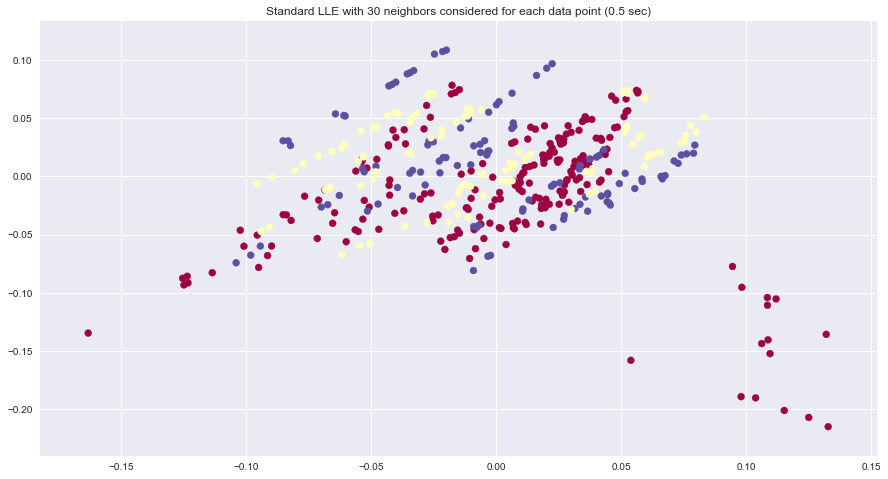

In [82]:
myIsomap(X_mice, Y_mice, n_neighbors=30)
myLLE(X_mice,Y_mice,n_neighbors=30)

<a id='mice'></a>

# 5. Implementation of pairwise distance methods onto mice data

[[back to top](#top)]

We are also interested to see the performance of pairwise distance methods onto drug discovery data, note that here we use rescaled mice data to do data analysis.

## Multidimensional Scaling

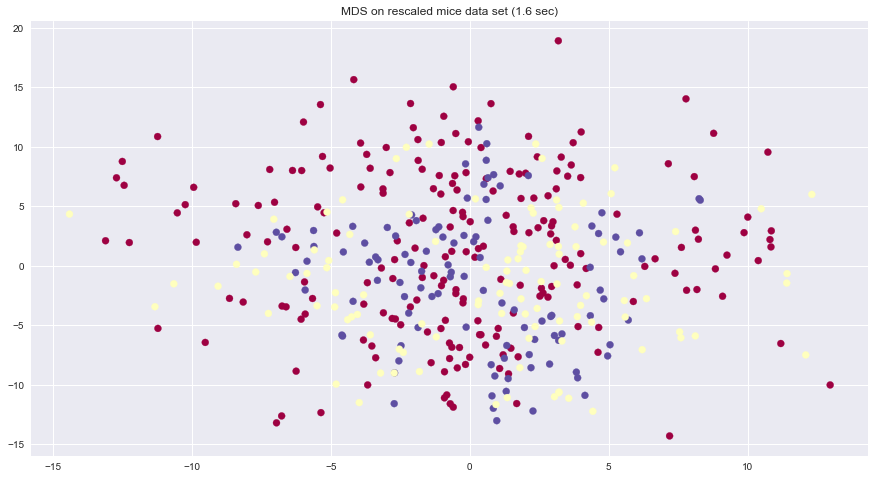

In [79]:
    t0 = time()
    mds = manifold.MDS(n_components, max_iter=100, n_init=1)
    Y_mds = mds.fit_transform(X_mice_scale)
    t1 = time()
    fig = plt.figure(figsize=(15, 8))
    plt.scatter(Y_mds[:, 0], Y_mds[:, 1], c=Y_mice, cmap=plt.cm.Spectral)
    
    plt.title("MDS on rescaled mice data set (%.2g sec)" % ( t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')
    plt.show()

## t-stochastic neighbour embedding

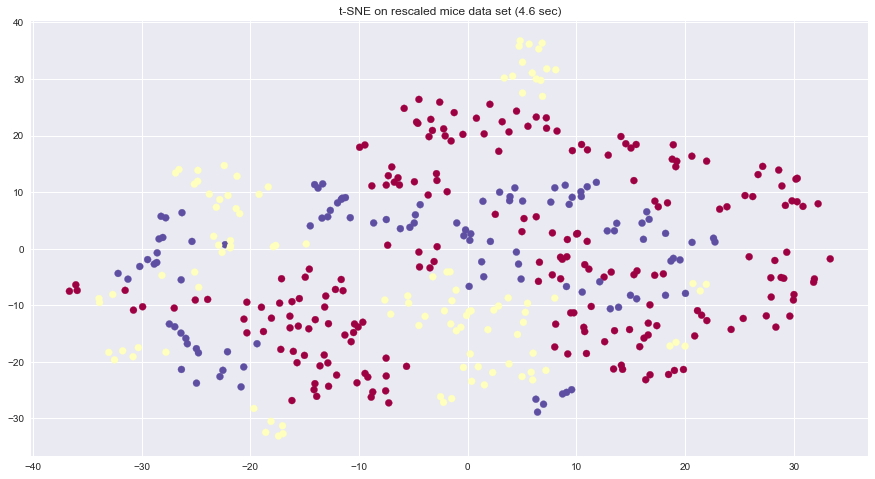

In [80]:
    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
    Y_tsne = tsne.fit_transform(X_mice_scale)
    t1 = time()
    fig = plt.figure(figsize=(15, 8))
    plt.scatter(Y_tsne[:, 0], Y_tsne[:, 1], c=Y_mice, cmap=plt.cm.Spectral)
    
    plt.title("t-SNE on rescaled mice data set (%.2g sec)" % ( t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')
    plt.show()

## Comments
> T-SNE perform better than MDS.

> T-SNE gives us more clusters than we expected, for example, the yellow cluster at the top. This might implies that we can further divided our data set into more classes. Such result of performance is still satified, especially for yellow cluster, each of these does not contain points from other group. However, it will be challenging to discover what's the features of each yellow cluster represents. Also, due to the approximate retrievable feature of t-SNE, more efforts need to be made to retrieve each projected point and find the common feature of them. 